Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


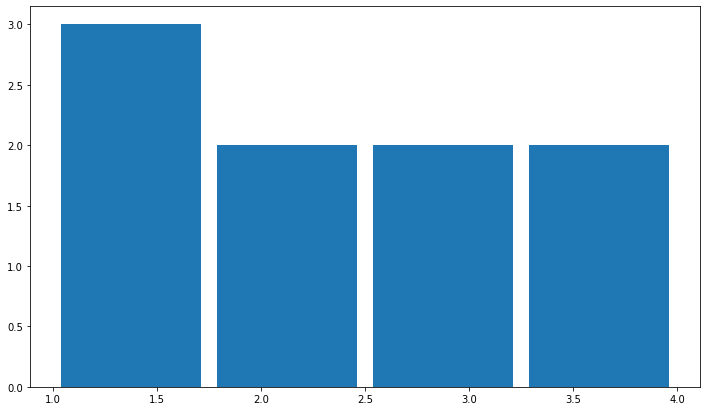

In [1]:
from typing import List, Tuple, Union
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12, 7)

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=4, 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [2]:
def fast_hist(array: List[Union[int, float]],
              bins_count: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    bins = np.zeros((bins_count, ), dtype=np.uint64)
    array = np.array(array)

    min_value = np.min(array)
    max_value = np.max(array)

    bin_step = (max_value - min_value) / bins_count
    labels = np.arange(min_value, max_value + bin_step / 2.0, bin_step)

    # bin_indices = np.subtract(np.searchsorted(labels[:-1], array, "right"), 1)
    bin_indices = np.subtract(np.ceil(np.divide(np.subtract(array, min_value), bin_step)), 1).astype("int64")
    indices, counts = np.unique(bin_indices, return_counts=True)
#     print(indices, counts)

    for index, count in zip(indices, counts):
        bins[max(index, 0)] += count

    return bins, labels


Значения колонок: [3 2 2 2]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


<BarContainer object of 4 artists>

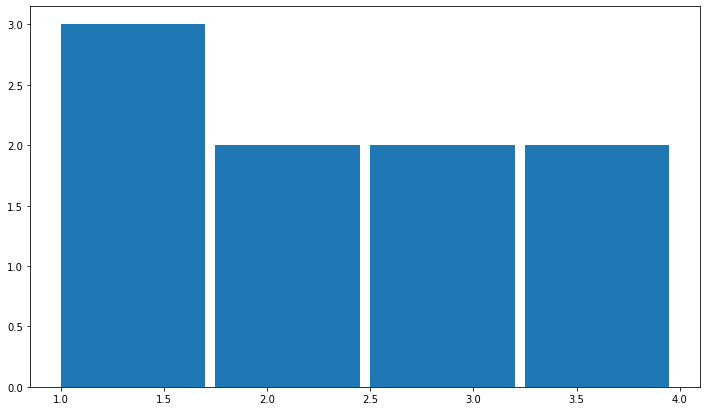

In [3]:
value_counts, bins_names = fast_hist(array, bins_count=4)

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

plt.bar(bins_names[:-1], value_counts, align="edge", width=0.7)

In [4]:
array = np.random.normal(1000, 600, 10000)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   2.,   3.,
          2.,   2.,   4.,   5.,   3.,   5.,   5.,   8.,   7.,  12.,  10.,
         17.,  19.,  22.,  40.,  44.,  40.,  49.,  70.,  71.,  83., 112.,
         93., 118., 127., 175., 170., 177., 189., 224., 218., 210., 230.,
        254., 266., 260., 305., 295., 293., 296., 290., 297., 322., 342.,
        281., 284., 257., 288., 279., 268., 235., 224., 229., 176., 213.,
        177., 156., 156., 136., 117., 106.,  88.,  78.,  69.,  64.,  59.,
         45.,  40.,  27.,  20.,  22.,  26.,  21.,  15.,   9.,  14.,   3.,
          9.,   6.,   4.,   0.,   1.,   2.,   0.,   2.,   0.,   2.,   0.,
          1.]),
 array([-1470.33082304, -1423.55503281, -1376.77924259, -1330.00345236,
        -1283.22766213, -1236.45187191, -1189.67608168, -1142.90029146,
        -1096.12450123, -1049.348711  , -1002.57292078,  -955.79713055,
         -909.02134033,  -862.2455501 ,  -815.46975987,  -768.69396965,
         -721.91817942,  -675.

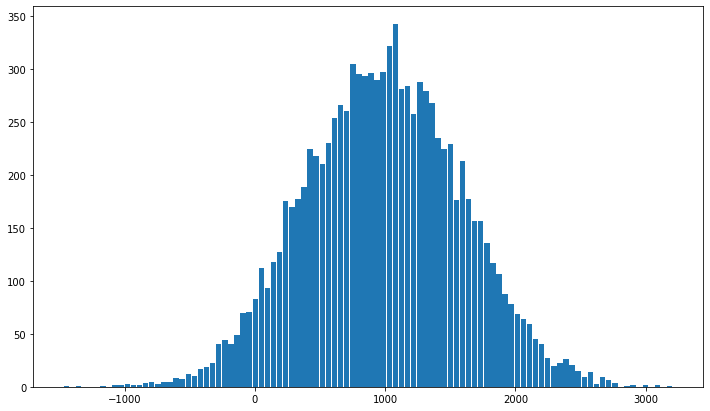

In [5]:
plt.hist(array, bins=100, rwidth=0.9)

<BarContainer object of 100 artists>

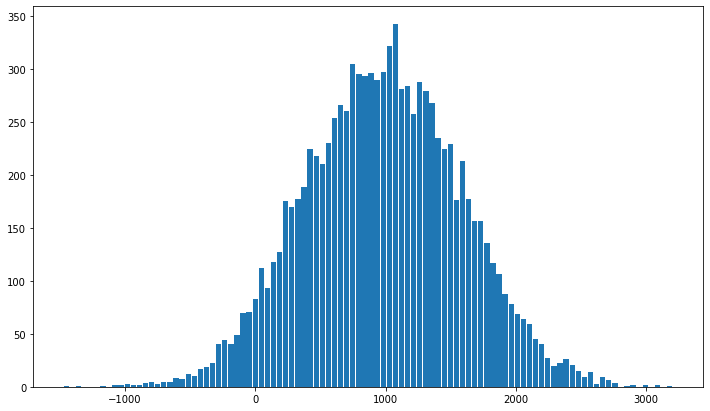

In [6]:
value_counts, bins_names = fast_hist(array, bins_count=100)

plt.bar(bins_names[:-1], value_counts, align="edge", width=41)

In [7]:
def wrapper_for_timeit_fast_hist(array, bins):
    value_counts, bins_names = fast_hist(array, bins_count=bins)
    
def wrapper_for_timeit_hist(array, bins):
    value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=bins, 
                                                   rwidth=0.9)

<BarContainer object of 100 artists>

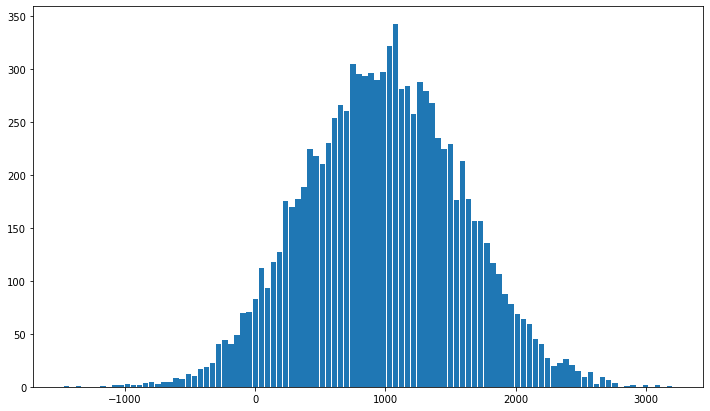

In [8]:
value_counts, bins_names = fast_hist(array, bins_count=100)

plt.bar(bins_names[:-1], value_counts, align="edge", width=42)

52.8 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


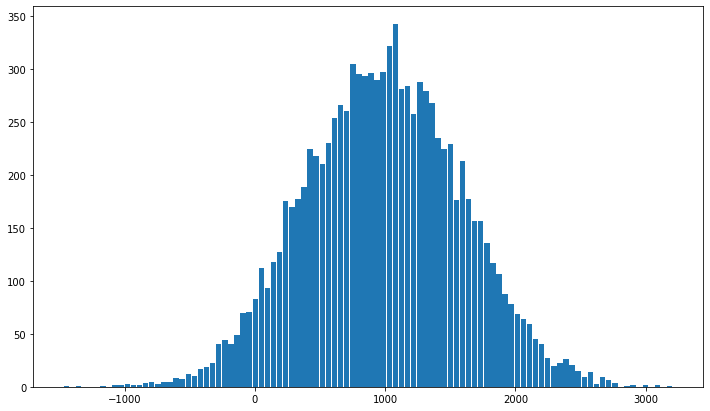

In [9]:
%timeit wrapper_for_timeit_hist(array, 100)

In [10]:
%timeit wrapper_for_timeit_fast_hist(array, 100)

775 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
